In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = sns.load_dataset('Sleep_Efficiency')

data.columns.isnull().any() # Check for any missing values

False

In [4]:
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
data.shape

(452, 15)

In [7]:
x = data[['Age', 'Sleep duration', 'Sleep efficiency']] # Our first feature set

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3) # Call KMeans

kmeans.fit(x) # Fit x

y_kmeans = kmeans.predict(x) # Predict y_kmeans

y_kmeans

array([2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1,
       1, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 1, 1,
       0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1,
       1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0,
       2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0,
       2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0,
       2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       0, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 2,
       0, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1,
       2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,

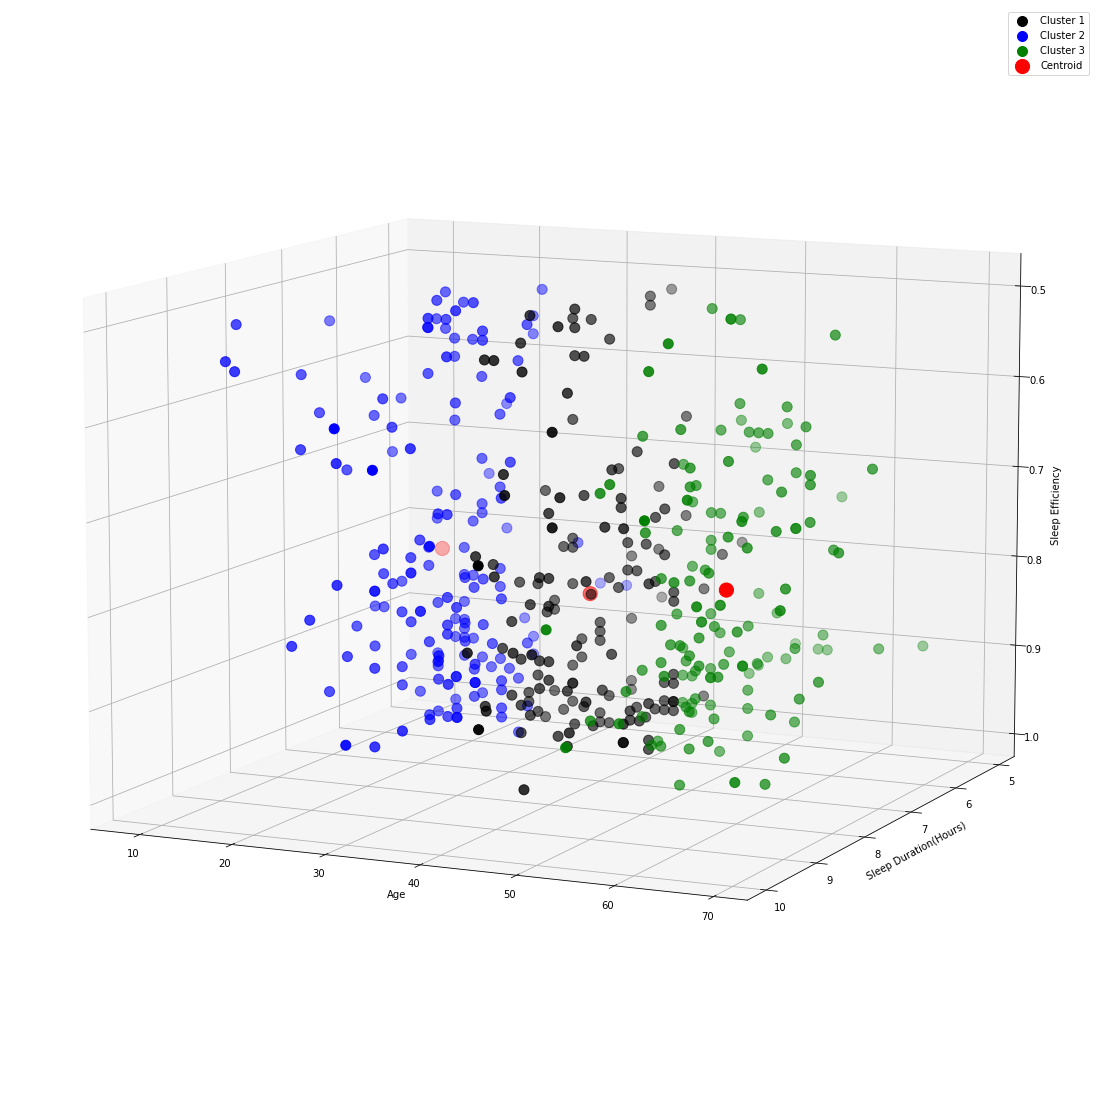

In [67]:
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[y_kmeans == 0]['Age'], x[y_kmeans == 0]['Sleep duration'], x[y_kmeans == 0]['Sleep efficiency'], s = 100, c = 'black', label = 'Cluster 1')
ax.scatter(x[y_kmeans == 1]['Age'], x[y_kmeans == 1]['Sleep duration'], x[y_kmeans == 1]['Sleep efficiency'], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(x[y_kmeans == 2]['Age'], x[y_kmeans == 2]['Sleep duration'], x[y_kmeans == 2]['Sleep efficiency'], s = 100, c = 'green', label = 'Cluster 3')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], color = 'red', label = 'Centroid', s = 200)

plt.xlabel('Age')
plt.ylabel('Sleep Duration(Hours)')
ax.set_zlabel('Sleep Efficiency')

ax.view_init(350, 65)

plt.legend()

plt.show()

In [336]:
"""From the graph above, we can tell that the clusters are divided by age. Cluster 1(black) ranges from 10 to 40 in age. 
Cluster 2(blue) ranges from 40 to 50 in age, and cluster 3(green) ranges from 40 to 70 in age. Within each cluster,
sleep duration that ranges from 7 to 10 provided a sleep efficiency of at least 0.6."""

'From the graph above, we can tell that the clusters are divided by age. Cluster 1(black) ranges from 10 to 30 in age. \nCluster 2(blue) ranges from 30 to 40 in age, and cluster 3(green) ranges from 40 to 70 in age. Within each cluster,\nsleep duration that ranges from 7 to 10 provided a sleep efficiency of at least 0.7.'

In [69]:
x2 = data[['Exercise frequency', 'Sleep duration', 'Sleep efficiency']] # Feature set 2

x2 = x2[x2['Exercise frequency'].notnull()] # Remove rows where exercise frequency is null

x2.shape

(446, 3)

In [70]:
kmeans = KMeans(n_clusters = 3) # Call KMeans

kmeans.fit(x2) # Fit x

y_kmeans = kmeans.predict(x2) # Predict y_kmeans

y_kmeans

array([1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2,
       1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2,
       0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0,
       2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2,

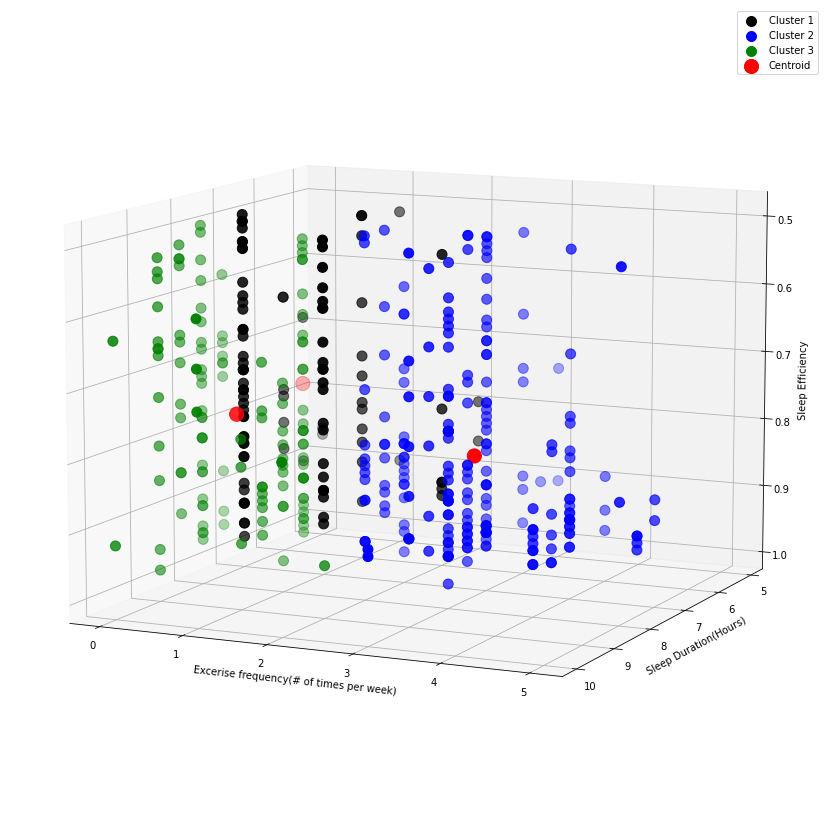

In [71]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x2[y_kmeans == 0]['Exercise frequency'], x2[y_kmeans == 0]['Sleep duration'], x2[y_kmeans == 0]['Sleep efficiency'], s = 100, c = 'black', label = 'Cluster 1')
ax.scatter(x2[y_kmeans == 1]['Exercise frequency'], x2[y_kmeans == 1]['Sleep duration'], x2[y_kmeans == 1]['Sleep efficiency'], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(x2[y_kmeans == 2]['Exercise frequency'], x2[y_kmeans == 2]['Sleep duration'], x2[y_kmeans == 2]['Sleep efficiency'], s = 100, c = 'green', label = 'Cluster 3')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], color = 'red', label = 'Centroid', s = 200)

plt.xlabel('Excerise frequency(# of times per week)')
plt.ylabel('Sleep Duration(Hours)')
ax.set_zlabel('Sleep Efficiency')

ax.view_init(350, 65)

plt.legend()

plt.show()

In [294]:
"""In the graph above, Cluster 1(black) is a group of individuals that don't exercise often but recieve at least 8
hours of sleep; therefore, majority of points in cluster 1 are above 0.6 sleep efficiency. Cluster 2(green) are 
individuals that don't exercise often and recieve less than 8 hours of sleep. The sleep efficiency of cluster 2 varies
greatly between 0.5 and 1. Cluster 3(blue) are indviduals that exercise at least 2 times a week, and the sleep
duration ranges from 5 to 10. """

"In the graph above, Cluster 1(black) is a group of individuals that don't exercise often but recieve at least 8\nhours of sleep; therefore, majority of points in cluster 1 are above 0.6 sleep efficiency. Cluster 2(green) are \nindividuals that don't exercise often and recieve less than 8 hours of sleep. The sleep efficiency of cluster 2 varies\ngreatly between 0.5 and 1. Cluster 3(blue) are indviduals that exercise at least 2 times a week, and the sleep\nduration ranges from 5 to 10. "